## Classification KNN TEST

### Libraries

In [65]:
# !pip install scikit-plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
os.environ["OMP_NUM_THREADS"] = "8"

In [66]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

### Data preprocessing

In [67]:
df = pd.read_csv("train_cleaned.csv")
test = pd.read_csv("test_cleaned.csv")

In [68]:
df = df.replace({"explicit": {False:0, True:1}})
test = test.replace({"explicit": {False:0, True:1}})

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              15000 non-null  object 
 1   duration_ms       15000 non-null  int64  
 2   explicit          15000 non-null  int64  
 3   popularity        15000 non-null  int64  
 4   artists           15000 non-null  object 
 5   album_name        15000 non-null  object 
 6   danceability      15000 non-null  float64
 7   energy            15000 non-null  float64
 8   key               15000 non-null  int64  
 9   loudness          15000 non-null  float64
 10  speechiness       15000 non-null  float64
 11  acousticness      15000 non-null  float64
 12  instrumentalness  15000 non-null  float64
 13  liveness          15000 non-null  float64
 14  valence           15000 non-null  float64
 15  tempo             15000 non-null  float64
 16  time_signature    15000 non-null  float6

### Preparing the training data

In [70]:
X = df.iloc[:, [1,2,6,7,8,9,10,11,12,13,14,15,16]].values
y = np.array(df.iloc[:, [-1]].values)

In [71]:
np.unique(y, return_counts=True)

(array(['afrobeat', 'black-metal', 'bluegrass', 'brazil', 'breakbeat',
        'chicago-house', 'disney', 'forro', 'happy', 'idm', 'indian',
        'industrial', 'iranian', 'j-dance', 'j-idol', 'mandopop', 'sleep',
        'spanish', 'study', 'techno'], dtype=object),
 array([750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750,
        750, 750, 750, 750, 750, 750, 750], dtype=int64))

## Partitioning

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
random_state = 0

In [74]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.333333333333333333, stratify=y, random_state=random_state
)

In [75]:
#with stratify
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_val, return_counts=True)[1] / len(y_val))

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]


In [76]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(10000, 13) (5000, 13) (10000, 1) (5000, 1)


np.unique(y_test, return_counts=True)

## Preparing the test data

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5000 non-null   object 
 1   duration_ms       5000 non-null   int64  
 2   explicit          5000 non-null   int64  
 3   popularity        5000 non-null   int64  
 4   artists           5000 non-null   object 
 5   album_name        5000 non-null   object 
 6   danceability      5000 non-null   float64
 7   energy            5000 non-null   float64
 8   key               5000 non-null   int64  
 9   loudness          5000 non-null   float64
 10  speechiness       5000 non-null   float64
 11  acousticness      5000 non-null   float64
 12  instrumentalness  5000 non-null   float64
 13  liveness          5000 non-null   float64
 14  valence           5000 non-null   float64
 15  tempo             5000 non-null   float64
 16  time_signature    5000 non-null   float64


In [78]:
X_test = test.iloc[:, [1,2,6,7,8,9,10,11,12,13,14,15,16]].values
y_test = np.array(test.iloc[:, [-1]].values)

## Normalization and unravelling

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
norm = MinMaxScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_val_norm = norm.transform(X_val)
X_test_norm = norm.transform(X_test)

In [81]:
y_train = np.ravel(y_train)
y_val = np.ravel(y_val)
y_test = np.ravel(y_test)

## Classifiers
Classifiers usually have a:
- `fit` method to train them on training data
- `predict` method to validate/test them on validation/test data

## KNN training

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
clf = KNeighborsClassifier(n_neighbors=35, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=35)

In [84]:
import warnings

# To suppress all warnings (not recommended)
warnings.filterwarnings("ignore")

#### Predicting the genre of X_test

In [85]:
# predict: Predict the class labels for the provided data.
y_test_pred = clf.predict(X_test_norm)
#prediction
y_test_pred

array(['j-idol', 'idm', 'spanish', ..., 'j-idol', 'black-metal', 'happy'],
      dtype=object)

In [86]:
# y_test contains the target labels (the TRUE genres)
y_test

array(['industrial', 'breakbeat', 'indian', ..., 'industrial',
       'black-metal', 'industrial'], dtype=object)

In [87]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.385


In [88]:
# score: Return the mean accuracy on the given test data and labels.
clf.score(X_test_norm, y_test)

0.385

In [89]:
# KNeighborsClassifier.score is doing this
(y_test_pred == y_test).sum() / len(y_test)

0.385

#### Training Performance evaluation

In [90]:
# print("F1:", f1_score(y_test, y_test_pred))

In [91]:
print("F1:", f1_score(y_test, y_test_pred, average="macro"))

F1: 0.3675126563715528


In [92]:
print("F1:", f1_score(y_test, y_test_pred, average="micro"))

F1: 0.38499999999999995


In [93]:
print("F1:", f1_score(y_test, y_test_pred, labels=['black-metal'], average="micro"))

F1: 0.5652892561983472


In [96]:
print("F1:", f1_score(y_test, y_test_pred, labels=['black-metal'], average="macro"))

F1: 0.5652892561983472


In [97]:
print("F1:", f1_score(y_test, y_test_pred, labels=['sleep'], average="macro"))

F1: 0.6952595936794583


In [98]:
print(classification_report(y_test, y_test_pred))

               precision    recall  f1-score   support

     afrobeat       0.22      0.14      0.17       250
  black-metal       0.48      0.68      0.57       250
    bluegrass       0.38      0.44      0.41       250
       brazil       0.25      0.18      0.21       250
    breakbeat       0.21      0.16      0.18       250
chicago-house       0.37      0.58      0.45       250
       disney       0.39      0.30      0.34       250
        forro       0.43      0.56      0.48       250
        happy       0.38      0.38      0.38       250
          idm       0.45      0.14      0.21       250
       indian       0.34      0.17      0.22       250
   industrial       0.28      0.30      0.29       250
      iranian       0.45      0.28      0.35       250
      j-dance       0.46      0.51      0.48       250
       j-idol       0.29      0.46      0.35       250
     mandopop       0.27      0.61      0.38       250
        sleep       0.80      0.62      0.70       250
      spa

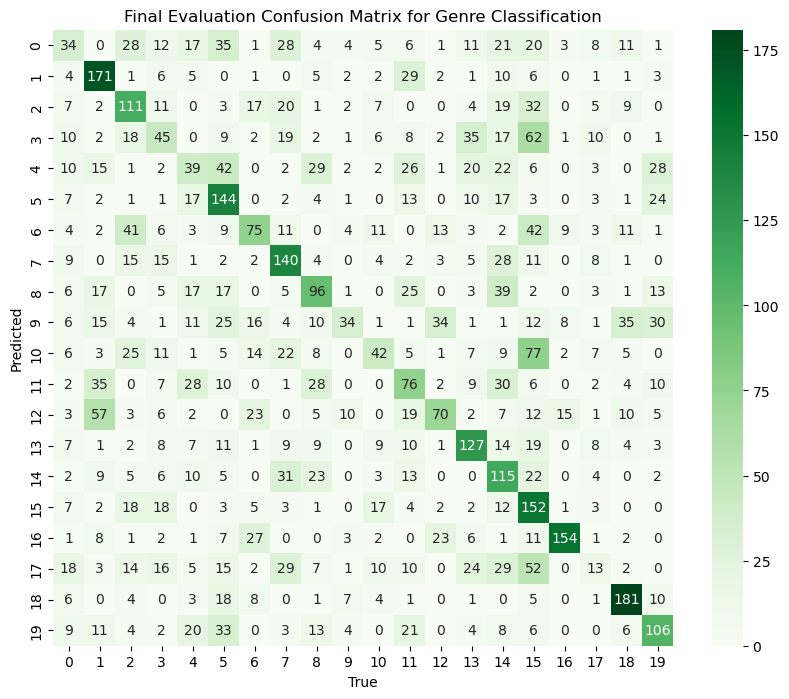

In [100]:
cf = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
plt.title('Final Evaluation Confusion Matrix for Genre Classification')
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.savefig('FE_Genre.png')
plt.show()

In [33]:
# Return probability estimates for the test data X.
y_test_pred_proba = clf.predict_proba(X_test_norm)
y_test_pred_proba[0:10]

array([[0.03, 0.05, 0.02, 0.05, 0.03, 0.01, 0.  , 0.07, 0.07, 0.  , 0.01,
        0.18, 0.  , 0.05, 0.36, 0.01, 0.  , 0.05, 0.  , 0.01],
       [0.  , 0.06, 0.  , 0.  , 0.06, 0.03, 0.02, 0.  , 0.06, 0.28, 0.02,
        0.03, 0.05, 0.  , 0.  , 0.  , 0.01, 0.01, 0.16, 0.21],
       [0.07, 0.02, 0.  , 0.06, 0.11, 0.07, 0.01, 0.02, 0.02, 0.01, 0.05,
        0.13, 0.05, 0.04, 0.03, 0.13, 0.01, 0.11, 0.  , 0.06],
       [0.08, 0.01, 0.03, 0.05, 0.12, 0.  , 0.01, 0.16, 0.16, 0.  , 0.  ,
        0.11, 0.01, 0.02, 0.15, 0.  , 0.  , 0.06, 0.  , 0.03],
       [0.11, 0.  , 0.02, 0.07, 0.1 , 0.21, 0.02, 0.05, 0.03, 0.  , 0.05,
        0.03, 0.01, 0.1 , 0.04, 0.04, 0.  , 0.07, 0.  , 0.05],
       [0.03, 0.02, 0.02, 0.06, 0.11, 0.15, 0.01, 0.01, 0.04, 0.  , 0.04,
        0.08, 0.  , 0.06, 0.13, 0.05, 0.01, 0.16, 0.  , 0.02],
       [0.03, 0.  , 0.02, 0.01, 0.  , 0.  , 0.3 , 0.  , 0.  , 0.16, 0.01,
        0.  , 0.2 , 0.  , 0.  , 0.  , 0.24, 0.  , 0.02, 0.01],
       [0.03, 0.01, 0.03, 0.01, 0.  , 0. 

In [34]:
y_test_pred[0:10]

array(['j-idol', 'idm', 'industrial', 'forro', 'chicago-house', 'spanish',
       'disney', 'study', 'mandopop', 'black-metal'], dtype=object)

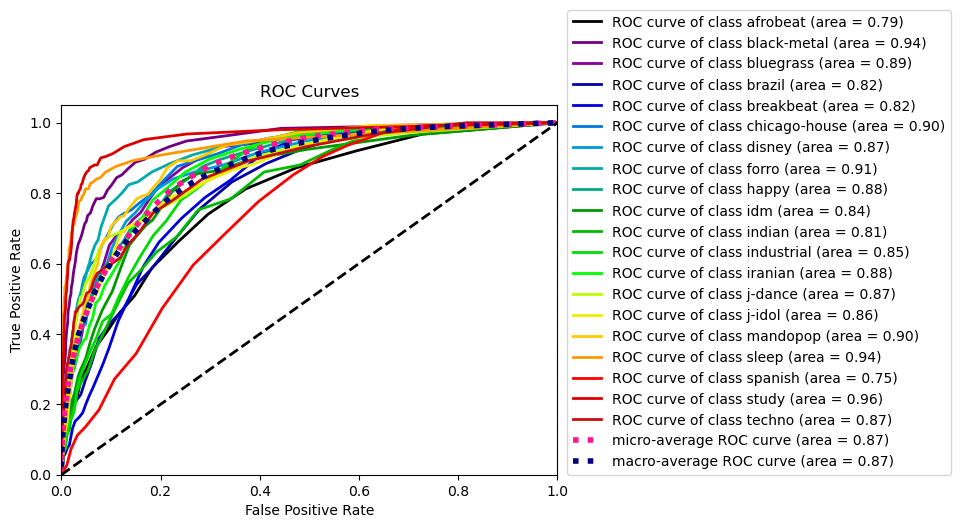

In [101]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, y_test_pred_proba)
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)
plt.savefig('FE ROC Genres.png')
plt.show()

In [102]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro")

0.8664414105263158

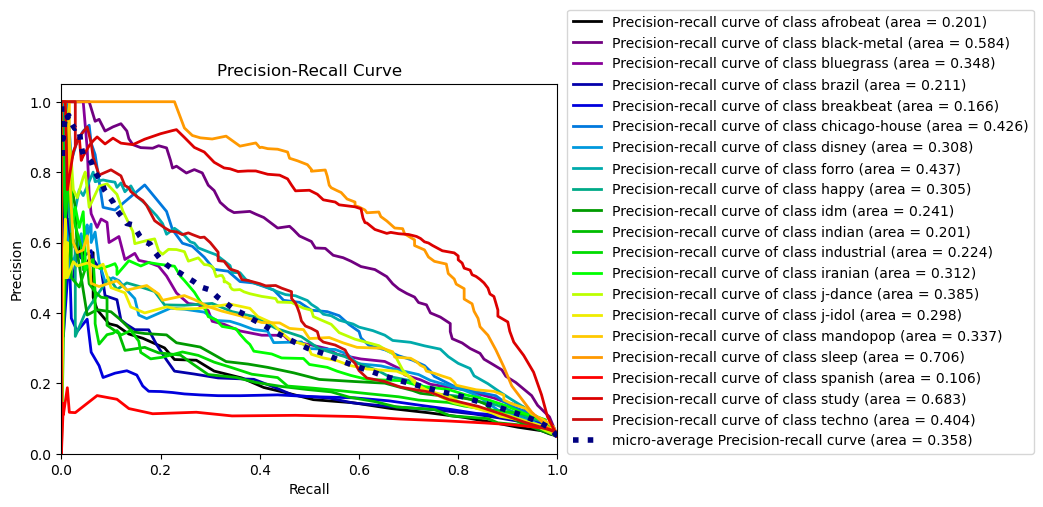

In [103]:
plot_precision_recall(y_test, y_test_pred_proba)
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)
plt.savefig('FE Recall Genres.png')
plt.show()

#### Repeated Holdout

In [38]:
N = 50
err = 0

for i in range(N):
    # stratified holdout
    X_rh_train, X_rh_val, y_rh_train, y_rh_val = train_test_split(X, y, test_size=0.333333333333333333, stratify=y)
    
    # normalize train set
    norm.fit(X_rh_train)
    X_rh_train_norm = norm.transform(X_rh_train)
    X_rh_test_norm = norm.transform(X_rh_val)

    # initialize and fit classifier
    clf = KNeighborsClassifier(n_neighbors=35, metric="euclidean", weights="uniform")
    clf.fit(X_rh_train_norm, y_rh_train)

    # computing error
    acc = clf.score(X_test_norm, y_test)
    err += 1 - acc

print("Overall error estimate:", err/N)

Overall error estimate: 0.6311759999999998


#### Cross-validation
https://scikit-learn.org/stable/modules/cross_validation.html

In [39]:
from sklearn.model_selection import cross_val_score
k = 10

In [40]:
# initialize classifier
clf = KNeighborsClassifier(n_neighbors=35, metric="euclidean", weights="uniform")

scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
scores

array([0.361, 0.37 , 0.373, 0.352, 0.39 , 0.344, 0.35 , 0.356, 0.346,
       0.367])

In [41]:
print("Overall error estimate:", 1 - scores.mean())

Overall error estimate: 0.6391


In [42]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 0.3609 (+/- 0.01)


In [43]:
# scoring default is accuracy
cross_val_score(clf, X_train_norm, y_train, cv=k, scoring='f1_macro')

array([0.33220027, 0.34143644, 0.34278114, 0.32919822, 0.36013866,
       0.31735048, 0.32187122, 0.33384559, 0.32337176, 0.33976041])

### Hyperparameters Tuning

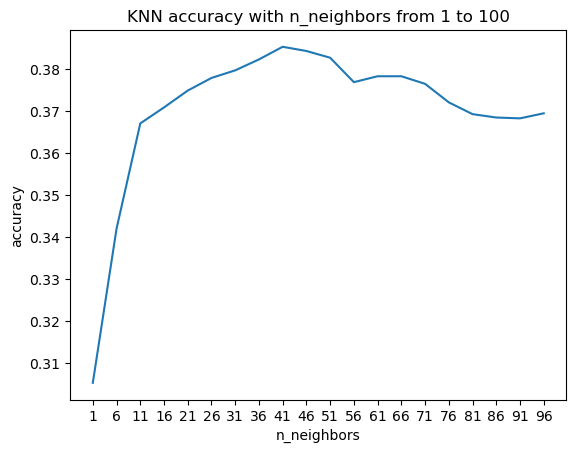

In [64]:
n_neighbors = range(1,100,5)
scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    clf.fit(X_train_norm, y_train)
    scores.append(clf.score(X_test_norm, y_test))

#plt.figure(figsize=(10, 8))
plt.plot(scores)
plt.title('KNN accuracy with n_neighbors from 1 to 100')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
#plt.savefig('Accuracy TEST 1-100.png')
plt.show()

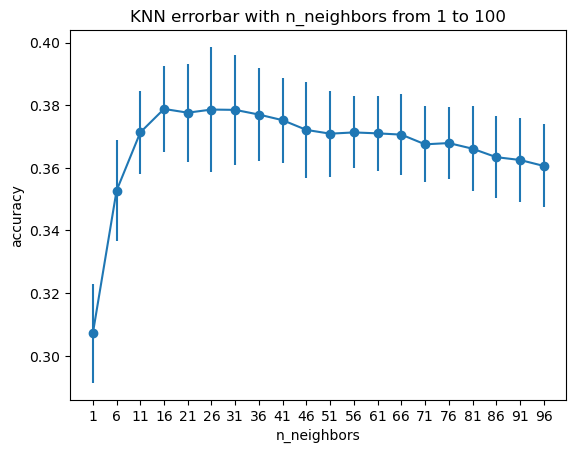

In [63]:
n_neighbors = range(1,100, 5)
avg_scores = list()
std_scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

#plt.plot(avg_scores)
#plt.figure(figsize=(10, 8))
plt.title('KNN errorbar with n_neighbors from 1 to 100')
plt.errorbar(range(len(n_neighbors)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
#plt.savefig('Errorbar TEST 1-100.png')
plt.show()

In [60]:
clf = KNeighborsClassifier(n_neighbors=16, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)
y_test_pred = clf.predict(X_test_norm)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.3708


#### Grid Search

In [47]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

%%time
param_grid = {
    "n_neighbors": np.arange(1, X_train.shape[0]//2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    # verbose=2
)

grid.fit(X_train_norm, y_train)
clf = grid.best_estimator_

print(grid.best_params_, grid.best_score_)

y_test_pred = clf.predict(X_test_norm)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

clf.score(X_test_norm, y_test)

# grid.cv_results_

results = pd.DataFrame(grid.cv_results_)
results

results["metric_weight"] = results["param_metric"] + ", " + results["param_weights"]

sns.lineplot(
    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"
)

### Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

#### Gaussian

In [49]:
clf = GaussianNB()

In [50]:
%%time
clf.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 11.8 ms


GaussianNB()

In [51]:
y_pred = clf.predict(X_test)
y_pred

array(['j-dance', 'happy', 'study', ..., 'j-idol', 'black-metal', 'happy'],
      dtype='<U13')

In [52]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     afrobeat       0.00      0.00      0.00       250
  black-metal       0.18      0.08      0.11       250
    bluegrass       0.30      0.02      0.04       250
       brazil       0.15      0.04      0.06       250
    breakbeat       0.00      0.00      0.00       250
chicago-house       0.26      0.58      0.36       250
       disney       0.28      0.28      0.28       250
        forro       0.04      0.01      0.01       250
        happy       0.16      0.35      0.22       250
          idm       0.34      0.08      0.14       250
       indian       0.03      0.00      0.01       250
   industrial       0.17      0.02      0.04       250
      iranian       0.57      0.14      0.22       250
      j-dance       0.13      0.51      0.21       250
       j-idol       0.20      0.60      0.30       250
     mandopop       0.14      0.34      0.20       250
        sleep       0.60      0.46      0.52       250
      spa

In [53]:
clf.predict_proba(X_test)

array([[4.62089221e-02, 3.12743179e-02, 4.51852987e-02, ...,
        9.18338998e-02, 1.48709473e-02, 4.44913550e-02],
       [4.42229325e-02, 7.39880996e-02, 5.56330510e-02, ...,
        5.55826701e-02, 3.01395495e-08, 3.18391322e-02],
       [5.60409371e-02, 3.52030175e-02, 4.96238008e-02, ...,
        7.71726730e-02, 2.60324076e-01, 1.63285013e-02],
       ...,
       [3.59270399e-02, 3.47891068e-02, 4.35358172e-02, ...,
        7.34353524e-02, 1.79285721e-04, 6.01344704e-02],
       [1.24633579e-01, 1.45022310e-01, 2.61722214e-02, ...,
        2.54615091e-02, 2.61542046e-14, 2.28266622e-02],
       [1.82294526e-02, 3.48688858e-02, 2.01573601e-02, ...,
        6.30433106e-02, 4.66238813e-05, 8.44539973e-03]])

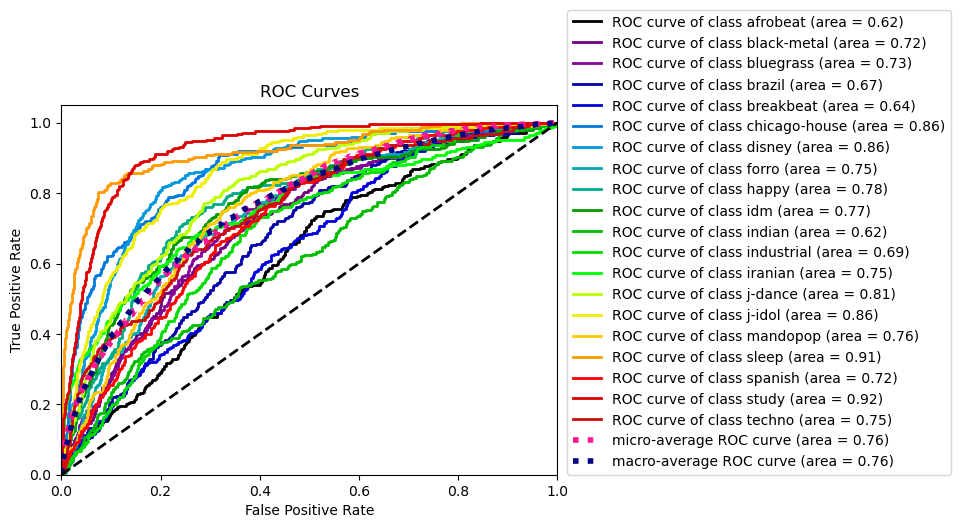

0.7601744000000001


In [54]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test))
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

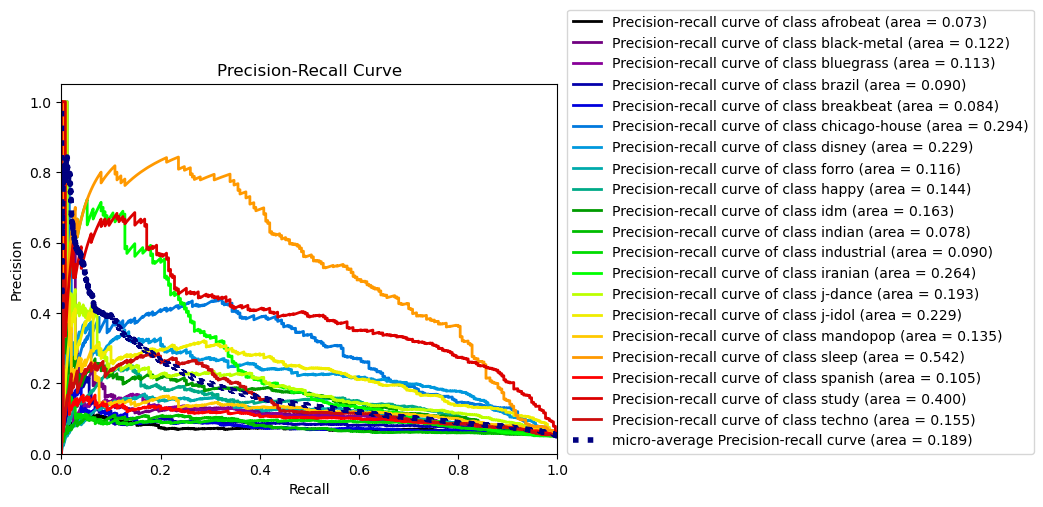

In [55]:
plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)

plt.show()

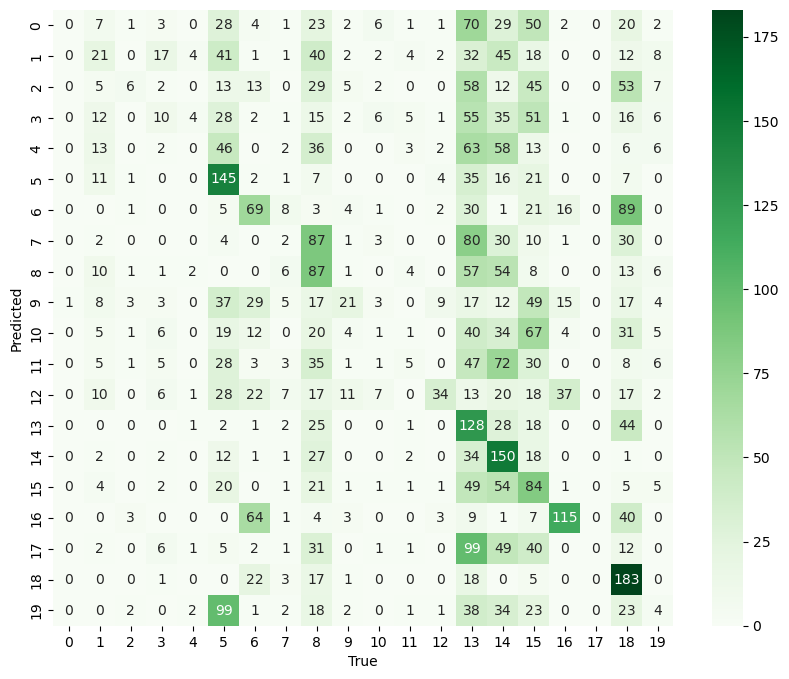

In [56]:
cf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()